<a href="https://colab.research.google.com/github/Khik2219/Assignment-9/blob/main/Kaito_Hikino_09_Assigment_6_text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Using this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Assignment: RNN text generation with your favorite book


## 1. Dataset
- Download your favorite book from https://www.gutenberg.org/
- Split into training (80%) and validation (20%).

In [10]:
import requests, re, numpy as np, random, math
from sklearn.model_selection import train_test_split
gutenberg_id = 84
text = requests.get(f"https://www.gutenberg.org/files/{gutenberg_id}/{gutenberg_id}-0.txt").text
split_idx = int(len(text) * 0.8)
train_text = text[:split_idx]
val_text   = text[split_idx:]

print("Train length:", len(train_text), "characters")
print("Val length:", len(val_text), "characters")

Train length: 341436 characters
Val length: 85360 characters


## 2. Preprocessing
- Convert text to lowercase.  
- Remove punctuation (except basic sentence delimiters).  
- Tokenize by words or characters (your choice).  
- Build a vocabulary (map each unique word to an integer ID).

In [11]:
train_text = train_text.lower()
val_text = val_text.lower()
train_text = re.sub(r"[^\w\s\.\!\?]", " ", train_text)
val_text   = re.sub(r"[^\w\s\.\!\?]", " ", val_text)
train_text = re.sub(r"\s+", " ", train_text).strip()
val_text   = re.sub(r"\s+", " ", val_text).strip()
train_words = train_text.split()
val_words   = val_text.split()

unique = sorted(set(train_words))
index = {word: idx for idx, word in enumerate(unique)}
word = np.array(unique)
vocab_size = len(unique)
print("Vocabulary size:", vocab_size)

Vocabulary size: 7657


## 3. Embedding Layer in Keras
Below is a minimal example of defining an `Embedding` layer:
```python
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,     # size of the vocabulary
    output_dim=128,           # embedding vector dimension
    input_length=sequence_length
)
```
- This layer transforms integer-encoded sequences (word IDs) into dense vector embeddings.

- Feed these embeddings into your LSTM or GRU OR 1D CNN layer.

In [20]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=256,
    input_length=40
)

model = models.Sequential([
    embedding_layer,
    layers.LSTM(512, return_sequences=True, dropout=0.2),
    layers.LSTM(512, dropout=0.2),
    layers.Dense(vocab_size, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
)
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Model
- Implement an LSTM or GRU or 1D CNN-based language model with:
  - **The Embedding layer** as input.
  - At least **one recurrent layer** (e.g., `LSTM(256)` or `GRU(256)` or your custom 1D CNN).
  - A **Dense** output layer with **softmax** activation for word prediction.
- Train for about **5–10 epochs** so it can finish in approximately **2 hours** on a standard machine.


Training shape: (60101, 40)
Validation shape: (15212, 40)
Epoch 1/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 98ms/step - loss: 7.3237 - sparse_categorical_accuracy: 0.0500 - val_loss: 6.3960 - val_sparse_categorical_accuracy: 0.0619
Epoch 2/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - loss: 6.4297 - sparse_categorical_accuracy: 0.0756 - val_loss: 6.1725 - val_sparse_categorical_accuracy: 0.0801
Epoch 3/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - loss: 6.0911 - sparse_categorical_accuracy: 0.0933 - val_loss: 6.0650 - val_sparse_categorical_accuracy: 0.1024
Epoch 4/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 5.8415 - sparse_categorical_accuracy: 0.1202 - val_loss: 5.9691 - val_sparse_categorical_accuracy: 0.1091
Epoch 5/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 5.6502 - sparse_categorical_accuracy: 0.1302 - val_loss: 5.9454 - val_sparse_categorical_accuracy: 0.1159
Epoch 6/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - loss: 5.4671 - sparse_categorical_accuracy: 0.1417 -

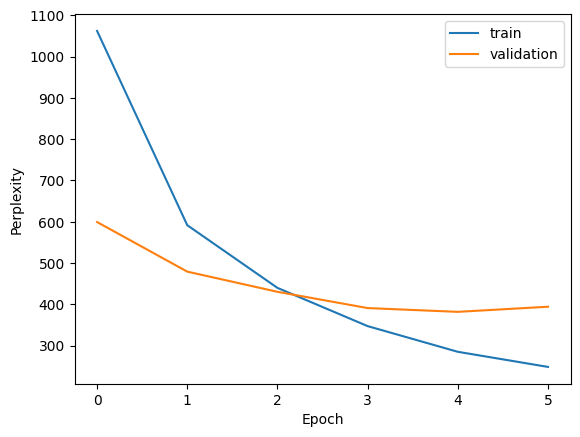


Final validation perplexity: 394.39


In [21]:
import math, matplotlib.pyplot as plt
train_ids = [index[word] for word in train_words]
val_ids   = [index.get(word, 0) for word in val_words]
sequence_length = 40
X_train = []
y_train = []
for i in range(len(train_ids) - sequence_length):
    X_train.append(train_ids[i : i + sequence_length])
    y_train.append(train_ids[i + sequence_length])
X_val = []
y_val = []
for i in range(len(val_ids) - sequence_length):
    X_val.append(val_ids[i : i + sequence_length])
    y_val.append(val_ids[i + sequence_length])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val   = np.array(X_val)
y_val   = np.array(y_val)

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)

history = model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=256,epochs=6)

train_perp = [math.exp(l) for l in history.history['loss']]
val_perp   = [math.exp(l) for l in history.history['val_loss']]
plt.figure()
plt.plot(train_perp, label='train')
plt.plot(val_perp, label='validation')
plt.xlabel('Epoch'); plt.ylabel('Perplexity'); plt.legend(); plt.show()
print(f"\nFinal validation perplexity: {val_perp[-1]:.2f}")

## 5. Training & Evaluation
- **Monitor** the loss on both training and validation sets.
- **Perplexity**: a common metric for language models.
  - It is the exponent of the average negative log-likelihood.
  - If your model outputs cross-entropy loss `H`, then `perplexity = e^H`.
  - Try to keep the validation perplexity **under 50** if possible. If you have higher value (which is possible) try to draw conclusions, why doesn't it decrease to a lower value.

In [5]:
#This is done in above cell
#The data may not be big enough to reduce perplexity under 50.

## 6. Generation Criteria
- After training, generate **two distinct text samples**, each at least **50 tokens**.
- Use **different seed phrases** (e.g., “love is” vs. “time will”).

In [6]:
import numpy as np

seed = "The man"
num_words = 50
seed_words = seed.lower().split()
seed_ids = [index.get(word, 0) for word in seed_words]
generated = seed_words.copy()

for _ in range(num_words):
    input_ids = seed_ids[-sequence_length:]
    if len(input_ids) < sequence_length:
        input_ids = [0] * (sequence_length - len(input_ids)) + input_ids
    input_array = np.array(input_ids).reshape(1, -1)
    predictions = model.predict(input_array, verbose=0)[0]
    next_id = np.argmax(predictions)
    next_word = word[next_id]
    generated.append(next_word)
    seed_ids.append(next_id)
print(" ".join(generated))


the man is not to be a few minutes in the same time i had been to be a few minutes in the same voice which i had been to be a few minutes in the same voice which i had been to be a few minutes in the same voice which


In [7]:
seed = "He spoke"
num_words = 50
seed_words = seed.lower().split()
seed_ids = [index.get(word, 0) for word in seed_words]
generated = seed_words.copy()

for _ in range(num_words):
    input_ids = seed_ids[-sequence_length:]
    if len(input_ids) < sequence_length:
        input_ids = [0] * (sequence_length - len(input_ids)) + input_ids
    input_array = np.array(input_ids).reshape(1, -1)
    predictions = model.predict(input_array, verbose=0)[0]
    next_id = np.argmax(predictions)
    next_word = word[next_id]
    generated.append(next_word)
    seed_ids.append(next_id)
print(" ".join(generated))

he spoke in the same time i had not been a few minutes in the same time i had been to be a few minutes in the same voice which i had been to be a few minutes in the same voice which i had been to be a few minutes in
